# Procesiranje prirodnih jezika
## Jovan Jurić 1206
### Zadatak 2 (Stopwords)

a)Skinuti   sa   sledećeg   linka ReLDI-NormTagNER-sr   2.1dataset. https://www.clarin.si/repository/xmlui/handle/11356/1240

b)Izvršiti  stemovanje  reči  iz  korpusa  korišćenjem  SCStemmers  za  srpski  jezik (https://vukbatanovic.github.io/SCStemmers/)

c)Generisati i sortirati opadajuće listu svih reči koje se javljaju u korpusu prema broju pojavljivanja.

d)Označiti prvih 5% reči kao stopreči i izdvojiti ih u posebnu listu. 

e)Napraviti analizu kojih su vrsta reči one koje su izdvojene kao stop reči. Da li su rezultati očekivani?

f)Napravite vizuelizaciju dobijenih rezultata.

g)Uz  kod,  predati  i  detaljan  izveštaj  u  kome  opisujete  izradu  domaćeg  zadatka,  
sa posebnim osvrtom na vrste reči kojima pripadaju dobijene stop reči.

#### Preprocesiranje podataka
Prvi korak u izradi zadatka jeste preprocesiranje podataka.
Izdvajaju se reči kao i tagovi svake reči, odnoso vrsta reči. Pošto se u korpusu nalaze podaci preuzeti sa twitter-a neophodno je dovesti podatke u upotrebljiv oblik.

In [11]:
from utils import preprocess_data

file_name = 'dataset.txt'
filtered_text, word_tag = preprocess_data(file_name)

#### Stemovanje reči
Stemovanje je heuristička metoda za normalizaciju reči gde od neke reči izvlačimo njen koren.
U nastavku je prikazan kod koji iz celog teksta vrši stemovanje za svaku reč u tekstu, takođe vraća se i podaci o broju pojavljivanja korena svake reči kao i vrste reči.

In [12]:
from utils import get_stem_dicts

stem_counter_dict, stem_tag_dict = get_stem_dicts(filtered_text, word_tag)

#### Izvlačenje stop reči
Naredni korak vrši izvlačenje stop reči. Stop reči se dobijaju tako što se iz korpusa izvuku najučestalje reči (odnosno reči sa najučestalijim korenom).

In [13]:
from utils import extract_stopwords

try:
    stopwords = extract_stopwords(stem_counter_dict)
except Exception as e:
    print(e.args)


#### Pregled podataka
U nastavku su prikazane najkorišćenije stop reči. Iz dataframe-a se izbacuju znakovi interpukcije jer se akcenat u ovom zadatku stavlja na reči.

In [14]:
import pandas as pd

df = pd.DataFrame({'Rec':[x[0] for x in stopwords], 'Broj': [x[1] for x in stopwords], 'Vrsta reci' :[stem_tag_dict[x[0]] for x in stopwords] }) 

df = df[df['Vrsta reci'] != 'PUNCT']
df.head(25)

,Rec,Broj,Vrsta reci
0,bit,4886,AUX
3,da,3154,SCONJ
4,i,2544,CCONJ
5,ja,1848,PRON
6,u,1743,ADP
7,seb,1700,PRON
8,na,1197,ADP
9,ne,1168,PART
10,taj,877,DET
11,sxt,861,NOUN


In [15]:
reci = df[['Rec', 'Broj']]
vrsta_reci = df[['Vrsta reci','Broj']]
vrsta_reci = vrsta_reci.groupby('Vrsta reci').sum().sort_values(by=['Broj'])
vrsta_reci

,Broj
Vrsta reci,
INTJ,451
PROPN,490
NUM,606
PART,1836
ADJ,2501
DET,3747
ADV,4400
CCONJ,4514
SCONJ,4909


#### Vizuelizacija podataka
Iz grafika možemo zaključiti da su većina stop reči glagoli, imenice, predlozi, zamenice i pomoćni glagoli. Ovo ima smisla jer su ove vrste reči osnove svake rečenične konstrukcije. 

<AxesSubplot:xlabel='Broj', ylabel='Vrsta reci'>

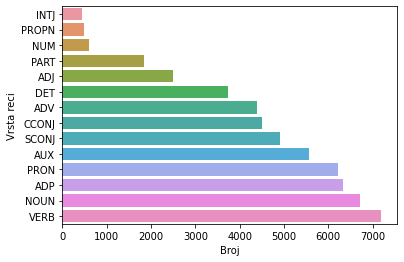

In [16]:
import seaborn as sb

sb.barplot(x='Broj', y='Vrsta reci', data = vrsta_reci.reset_index())

In [17]:
# prikaz značenja skraćenica
translate = { 
    'AUX': 'pomocni glagol',
    'PUNCT': 'interpunkcija',
    'SCONJ': 'veznik',
    'CCONJ': 'veznik',
    'PRON': 'zamenica',
    'PART': 'prilozi',
    'ADP': 'predlog',
    'DET': 'recca',
    'NOUN': 'imenica',
    'ADJ': 'pridev',
    'VERB': 'glagol',
    'ADV': 'prilog',
    'NUM': 'broj',
    'PROPN': 'imenica',
    'INTJ': 'uzvik',
}